# 1.2 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter, OrderedDict
from dython.nominal import associations

Time to analyze our data! First, let's load it along with some of the raw data:

In [2]:
all_data = pd.read_csv('../local_data/all_data.csv', header=0, encoding='latin-1')
users = pd.read_csv('../data/users.csv', header=0)
movies = pd.read_csv('../data/movies.csv', header=0, encoding='latin-1')

Making sure `genres` is interpreted as a list:

In [3]:
all_data['genres'] = all_data['genres'].apply(literal_eval)
all_data = all_data.drop('timestamp', axis=1)
all_data.head()

,user,movie,rating,hour,day,month,gender,age,occupation,zip,city,state,title,genres,movie_year
0,1,1193,5,0,1,1,1.0,1,10,48067.0,Royal Oak,MI,One Flew Over the Cuckoo's Nest,[Drama],1975
1,2,1193,5,23,0,12,0.0,56,16,70072.0,Marrero,LA,One Flew Over the Cuckoo's Nest,[Drama],1975
2,12,1193,4,1,0,12,0.0,25,12,32793.0,Winter Park,FL,One Flew Over the Cuckoo's Nest,[Drama],1975
3,15,1193,4,20,6,12,0.0,25,7,22903.0,Charlottesville,VA,One Flew Over the Cuckoo's Nest,[Drama],1975
4,17,1193,5,8,6,12,0.0,50,1,95350.0,Modesto,CA,One Flew Over the Cuckoo's Nest,[Drama],1975


Now let's begin with EDA. First let's consider the rating distribution. We can caearly see that there are far less movies with 1 or 2 stars than 3 or above. This means either users know which movies they'll like and therefore barely watch films the rate low, or that users simply don't take the time to rate movies they didn't like. Either way, we see our data is quite biased towards high ratings.

<AxesSubplot:>

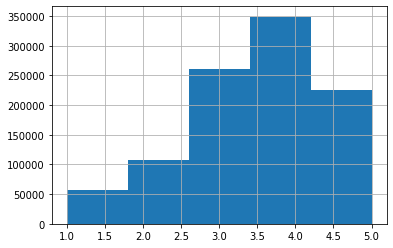

In [4]:
all_data['rating'].hist(bins=5)

Now let's examine the users activity time. Below we can see the ratings count by hour of the day. We see users tend to be most active during evening to late-night hours, with least activity during noon.

array([[<AxesSubplot:title={'center':'hour'}>]], dtype=object)

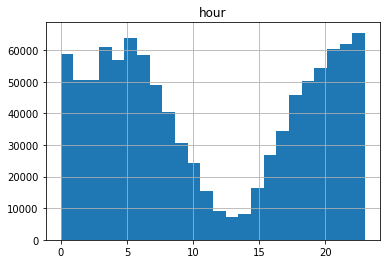

In [5]:
all_data.hist('hour', bins=24)

In the plot below we can see that Monday is the most active day (0 = Sunday), and users activity decreases all the way till Saturday, when we see the first increase only on Sunday.

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

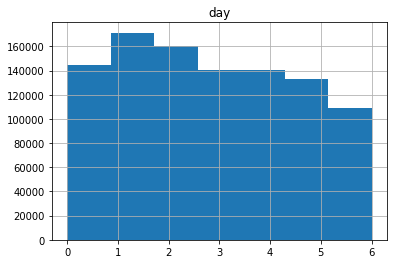

In [6]:
all_data.hist('day', bins=7)

We can clearly see that users tend to be more active during the second half of the year, with November being the most active month.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

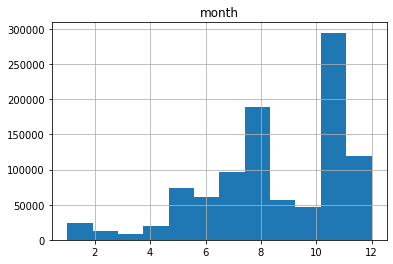

In [7]:
all_data.hist('month', bins=12)

Below we see that users occupation isn't distributed evenly. The two most commin occupations correspond to indices 4 and 7, which are "college/grad student" and "executive/managerial".

<AxesSubplot:>

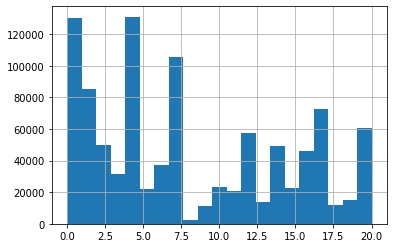

In [8]:
all_data['occupation'].hist(bins=21)

Below we see that the vast majority of our users correspond to age-index 25, meaning they are 25 to 34 years old. Note we're using the `users.csv` file here.

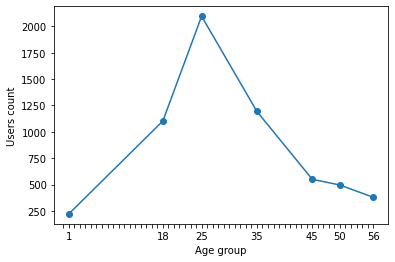

In [9]:
users_age = {k: v for k, v in sorted(Counter(users['age']).items())}
r = list(range(int(max(users_age.keys())+1)))
plt.xticks(r, [str(i) if i in users_age.keys() else '' for i in r])
plt.xlabel("Age group")
plt.ylabel("Users count")
plt.plot(users_age.keys(), users_age.values(), 'o-')
plt.show()

What is the ratio between men and women?

Men/Female ratio: 2.5


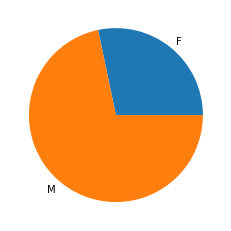

In [10]:
gender_dict = Counter(users['gender'].explode('gender'))
plt.pie(gender_dict.values(), labels=gender_dict.keys())
print(f'Men/Female ratio: {float(gender_dict["M"])/gender_dict["F"]:.1f}')
plt.show()

Let's consider users preferences when it comes to the release year of the film. Remember this datasset consists of ratings made during the year 2000. It seems as users favor films released during the previous decade.

<AxesSubplot:xlabel='Release year', ylabel='Ratings count'>

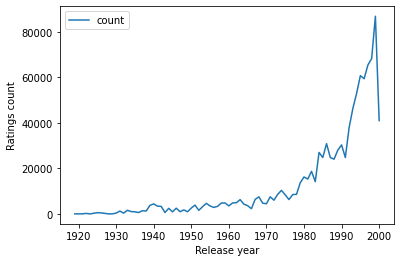

In [11]:
pd.DataFrame.from_dict(data={k: v for k, v in sorted(Counter(all_data['movie_year']).items())}, columns=['count'], orient='index').plot(y='count', use_index=True, xlabel="Release year", ylabel="Ratings count")

But is it so? Let's take a deeper look into this. Below we count the number of movies released each year. This plot looks very familiar to the one above, stating there are simply more movies relased during the 90s than any other decade in this dataset.

<AxesSubplot:xlabel='Release year', ylabel='Movies count'>

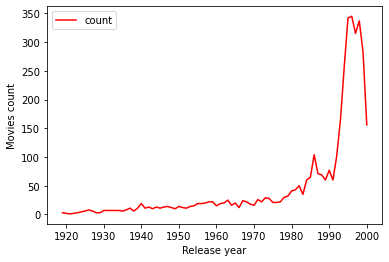

In [12]:
movies['movie_year'] = movies['title'].apply(lambda title: int(title[-5:-1]))
pd.DataFrame.from_dict(data={k: v for k, v in sorted(Counter(movies['movie_year']).items())}, columns=['count'], orient='index').plot(y='count', use_index=True, c='r', xlabel="Release year", ylabel="Movies count")

If we normalize each year's ratings count by dividing it by the number of movies released, we see users are actually less fond of movies of the last decade.

<AxesSubplot:xlabel='Release year', ylabel='Normalized ratings count'>

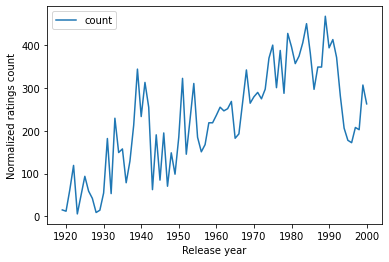

In [13]:
views_dict = Counter(all_data['movie_year'])
years_dict = Counter(movies['movie_year'])
d = {k:float(v)/years_dict[k] for k,v in views_dict.items()}
pd.DataFrame.from_dict(data={k: v for k, v in sorted(d.items())}, columns=['count'], orient='index').plot(y='count', use_index=True, xlabel="Release year", ylabel="Normalized ratings count")

Let's see which genres are the most watched ones:

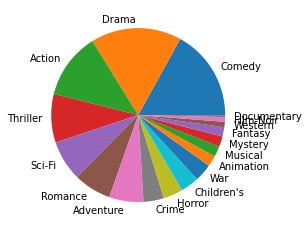

In [14]:
genres_dict = {k: v for k, v in sorted(Counter(all_data['genres'].explode('genres')).items(), key=lambda item: -item[1])}
plt.pie(genres_dict.values(), labels=genres_dict.keys())
plt.show()

Let's consider users geographical info, top to bottom. We see that from the 50 states, about 25% of traffic originates in California and New-York 

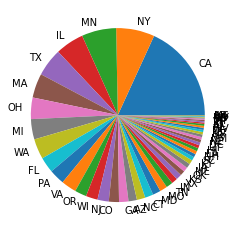

In [15]:
states_dict = OrderedDict()
for k,v in sorted(Counter(all_data['state']).items(), key=lambda item: -item[1]):
    states_dict[k] = v
plt.pie(states_dict.values(), labels=states_dict.keys())
plt.show()

Looking at traffic per city, we see that though California is by far the state with the most traffic, the two leading cities are not in California: Minneapolis (MN) and New-York (NY). Only the third is: San Francisco.

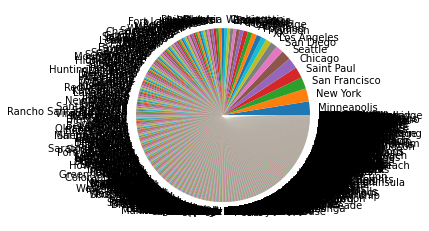

In [16]:
cities_dict = OrderedDict()
for k,v in sorted(Counter(all_data['city']).items(), key=lambda item: -item[1]):
    cities_dict[k] = v
plt.pie(cities_dict.values(), labels=cities_dict.keys())
plt.show()

Now to zip codes. What I'd like us to look at is the traffic from each zip code - but also how many different users share the same zip code. We can see that in the vast majority of cases, there is only a single user (or two) per zip code, which makes the feature quite redundant.

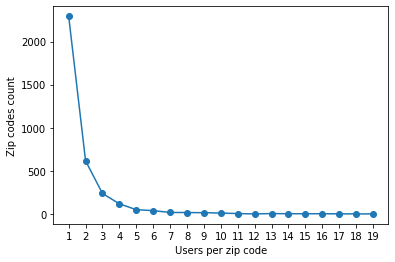

In [17]:
users_zip = OrderedDict()
for k,v in sorted(Counter(Counter(users['zip']).values()).items()):
    users_zip[k] = v
plt.xticks(range(max(users_zip.keys())+1))
plt.xlabel("Users per zip code")
plt.ylabel("Zip codes count")
plt.plot(users_zip.keys(), users_zip.values(), 'o-')
plt.show()

Lastly, I find it very useful to check for correlations and associations between the different features. Firstly, it allows us to make some sanity checks about the data. Here are some:

* `zip`, `city` and `state` are positively correlated
* `movie` and `movie_year` are positively correlated

Here are some things we can learn for this heatmap:

* There is a medium-strength correlation between `movie` and `rating`. This means that while some movies seem to receive somewhat similar ratings, user are not unanimous
* `user` and `zip` are highly correlated, supporting our findings from before
* `age` has a medium-strength correlation with `occupation`, and a little bit stronger one with `city`, but not with `state`

Note that an asymmetric measure of association is used for categorical-categorical relations ([Theil's U](https://en.wikipedia.org/wiki/Uncertainty_coefficient)), meaning the heatmap is not entirely symmetrical.

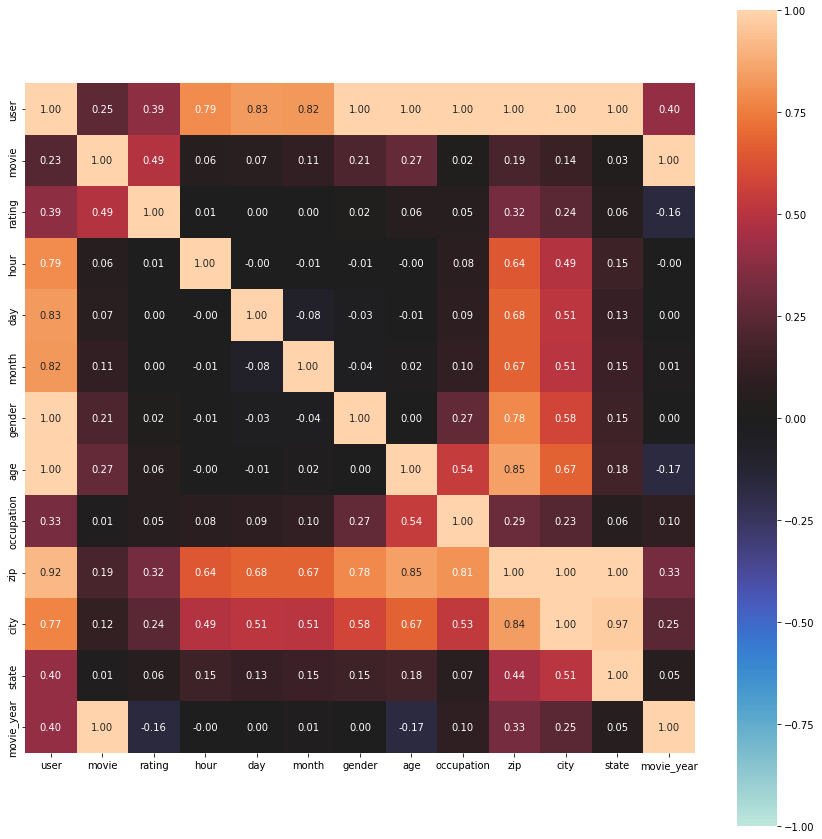

<AxesSubplot:>

In [18]:
associations(all_data.drop(['title','genres'], axis=1), figsize=(15,15), nom_nom_assoc='theil',
             nominal_columns=['user','movie','occupation','zip','city','state'])['ax']